# DAM4L9 | Python: integraciones y conexiones con otras herramientas

## Consultas básicas SQL en Python

#### Sintaxis de SQL en Python

Cuando trabajamos con bases de datos utilizando Python, es común conectar Python a distintos Sistemas de Gestión de Bases de Datos (DBMS por sus siglas en inglés) como SQL Server, MySQL, PostgreSQL, entre otros. Cada uno de estos DBMS utiliza SQL como su lenguaje de consulta, pero existen variaciones sutiles en la sintaxis y en las funciones soportadas que pueden llevar a errores si no se consideran cuidadosamente. Vamos a explorar algunas de estas diferencias y cómo pueden afectar tus consultas cuando trabajas desde Python.

Caso de negocio: UBIDIFY


Ubidify es una empresa emergente en el sector del transporte compartido, que busca innovar en la forma en que las personas se movilizan en las áreas urbanas. Utilizando una plataforma tecnológica avanzada, Ubidify conecta a pasajeros con conductores de vehículos registrados en tiempo real, ofreciendo una alternativa segura, confiable y conveniente al transporte público tradicional. Con una interfaz amigable y un sistema de tarifas competitivo, Ubidify aspira a mejorar la experiencia de transporte en la ciudad, reduciendo tiempos de espera y personalizando el servicio de movilidad.

Objetivos generales

Se espera que como analista puedas:

• Generar un entendimiento profundo del modelo de datos proporcionado por Ubidify, incluyendo las relaciones entre las diferentes tablas y cómo estas relaciones afectan la integridad y el análisis de los datos.

• Crear scripts que permiten realizar conexiones a las BD de datos de Ubidify y a partir de ellos automatizar ciertos procesos de extracción de datos.

• Manipular y gestionar la base de datos de Ubidify utilizando Python. Esto incluye realizar consultas SQL, creando df para extraer insights y responder a preguntas de negocio específicas.

Para avanzar en este caso deberás utilizar SQL Server tal como aprendimos en módulos anteriores 

#### Consultas básicas SQL (Python)

Sintaxis SQL

Como aprendimos en módulos anteriores, SQL (Structured Query Language) es un lenguaje de programación diseñado para gestionar y manipular bases de datos relacionales. 

Como analistas de datos por lo general, utilizaremos SQL para consultar datos almacenados en una base de datos.

Esto facilita la automatización de tareas y el análisis de grandes volúmenes de datos, realizando cargas y pequeñas transformaciones mediante un script. Existen algunos módulos necesarios para trabajar con cada tipo de BD de datos relacionales y no relacione

PostgreSQL

Para el caso de PostgreSQL se utiliza:

pip install psycopg2

MySQL
Para el caso de MySQL se utiliza:

pip install mysql-connector-python

- Otra opción

pip install PyMySQL

##### Veamos cómo conectarnos desde Python con SQL Server

Esta conexión puede realizarse utilizando dos módulos distintos,  pymssql o pyodbc. La elección depende de varios factores, incluidos la preferencia personal, las necesidades específicas del proyecto, y las características de cada módulo. 

En esta clase en particular utilizaremos pyodbc, debido a los siguientes factores:

• Versatilidad: pyodbc permite conexiones a múltiples bases de datos que soporten ODBC*, no solo SQL Server. Esto es útil en entornos donde se trabaja con varias bases de datos.

• Ampliamente adoptado: es ampliamente usado en la industria, lo que significa que hay más ejemplos y más apoyo comunitario.

• Características avanzadas: soporta funcionalidades más avanzadas gracias a su integración con ODBC, como la configuración detallada de conexiones y el manejo avanzado de tipos de datos.

*ODBC es una interfaz de nivel de llamada que permite que las aplicaciones tengan acceso a los datos de cualquier base de datos en la que haya un controlador ODBC. Puedes obtener más información https://learn.microsoft.com/es-es/cpp/data/odbc/odbc-basics?view=msvc-170
https://learn.microsoft.com/es-es/sql/connect/python/pymssql/python-sql-driver-pymssql?view=sql-server-ver16

Recuerda primero instalar con pip, puedes hacerlo de la siguiente manera, como hemos ido aprendiendo durante este módulo 

In [14]:
pip install pymssql

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


Una vez instalada la librería, podremos comenzar a elaborar el script que permite conectar la BD con python, en este punto profundizaremos específicamente en la conexión y en los puntos siguientes desarrollaremos cursor(), for(), print(), close().
De todas formas es necesario que ejecutes el script completo, realizando algunos cambios en las variables, para probar tu conexión.
Como en cada tarea que ejecutemos en python, es importante comenzar importando las librerías necesarias, en este caso pyodbc.

Como en cada tarea que ejecutemos en python, es importante comenzar importando las librerías necesarias, en este caso pyodbc.

In [21]:
import pyodbc

Al trabajar con Python para conectar con SQL Server, es fundamental comprender los componentes esenciales de lo que se denomina “cadena de conexión”, particularmente los términos server, database, y driver. Cada uno de estos juega un papel crucial en el establecimiento de una conexión efectiva y segura entre tu script de Python y la base de datos SQL Server. Veamos cada uno a continuación:

1️⃣ Server
El server especifica la dirección del servidor donde reside la base de datos SQL Server. Puede ser un nombre de servidor, una dirección IP, o localhost si el servidor se encuentra en la misma máquina que el cliente que intenta hacer la conexión.
Consideraciones:
• Accesibilidad: el servidor debe estar accesible desde la máquina donde se ejecuta Python. Si estás en un entorno de red, verifica que no haya firewalls o políticas de red que bloqueen el acceso.
• Nombre del Servidor: en ambientes de desarrollo, es común usar localhost. Para producción o entornos distribuidos, es más probable que necesites una dirección IP o un nombre de dominio completamente calificado.
• Instancias nombradas: SQL Server permite múltiples instancias en el mismo servidor. Si estás utilizando una instancia nombrada (por ejemplo, DESKTOP-XXXX\SQLEXPRESS), asegúrate de que está correctamente especificada en tu cadena de conexión.

2️⃣ Database
El término database refiere al nombre de la base de datos específica en SQL Server a la cual deseas conectarte. Esta debe estar creada previamente en SQL Server antes de intentar conectarte desde Python. En nuestro caso debe ser ‘Ubidify’.
Consideraciones:
• Existencia: la base de datos debe existir. Intentar conectarse a una base de datos que no existe resultará en errores.
• Permisos: el usuario con el que intentas conectarte debe tener los permisos adecuados para acceder a la base de datos especificada. Esto incluye permisos para leer, escribir y realizar cualquier otra operación necesaria para tu aplicación.

3️⃣ Driver
El driver es quizás el componente más técnico de la cadena de conexión. Es el software que facilita la comunicación entre Python y el servidor SQL Server. El driver debe estar instalado y configurado correctamente en la máquina cliente.
Consideraciones:
• Compatibilidad: asegúrate de que el driver que estás utilizando es compatible con la versión de SQL Server a la que estás intentando conectarte. Por ejemplo, "ODBC Driver 17 for SQL Server" es compatible con versiones modernas de SQL Server.
• Instalación: el driver debe estar instalado correctamente en el sistema cliente. Para SQL Server, normalmente esto significa instalar uno de los drivers ODBC proporcionados por Microsoft.
• Especificar el driver correcto: la cadena de conexión debe referirse al nombre exacto del driver instalado. Un error común es especificar un nombre de driver incorrecto o desactualizado, lo cual impedirá la conexión.

Ejemplo de cadena de conexión

Aquí tienes un ejemplo de cómo se vería una cadena de conexión típica utilizando pyodbc:

Aquí tienes un ejemplo de cómo se vería una cadena de conexión típica utilizando pyodbc:

In [17]:
server = 'LAPTOP-1BRQB67\\SQLEXPRESS'  # Asegúrate de que el nombre del servidor está correcto
database = 'Ubidify'  # El nombre de la base de datos
driver = 'ODBC Driver 17 for SQL Server'  # El driver que tienes instalado

conn_str = f'DRIVER={{driver}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
connection = pyodbc.connect(conn_str)
cursor = connection.cursor()
print(cursor)
# Asegúrate de cerrar tus conexiones
cursor.close()
connection.close()


InterfaceError: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

In [5]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pyodbc

# List all ODBC drivers installed. Verificacion de los drivers instalados,
drivers = pyodbc.drivers()
print("ODBC Drivers installed:")
for driver in drivers:
    print(driver)


ODBC Drivers installed:
SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
ODBC Driver 18 for SQL Server


In [1]:
# Pare verificar la version de python, si es de 64 bits
import struct
print(struct.calcsize("P") * 8)

64


In [12]:
# No funciono, lo corregi abajo con ayuda de chat.
import pyodbc
server = 'OUTREACH-PC\\SQLEXPRESS'  # Asegúrate de que el nombre del servidor está correcto
database = 'Ubidify'  # El nombre de la base de datos
driver = 'ODBC Driver 17 for SQL Server'  # El driver que tienes instalado

conn_str = f'DRIVER={{driver}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
connection = pyodbc.connect(conn_str)
cursor = connection.cursor()
print(cursor)
# Asegúrate de cerrar tus conexiones
cursor.close()
connection.close()


InterfaceError: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')

In [13]:
# Esta es la correccion
import pyodbc

server = 'OUTREACH-PC\\SQLEXPRESS'  # Asegúrate de que el nombre del servidor está correcto
database = 'Ubidify'  # El nombre de la base de datos
driver = 'ODBC Driver 17 for SQL Server'  # El driver que tienes instalado

conn_str = (
    f"DRIVER={{{driver}}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
    f"Encrypt=yes;"
    f"TrustServerCertificate=yes;"
)

try:
    connection = pyodbc.connect(conn_str)
    cursor = connection.cursor()
    print("Connection successful!")
    print(cursor)
    
    # Asegúrate de cerrar tus conexiones
    cursor.close()
    connection.close()
except pyodbc.Error as ex:
    print("Connection failed!")
    print(ex)


Connection successful!


Aquí ampliamos el alcance del script con algunos métodos que desarrollaremos en el punto siguiente, pero en donde puedes asegurarte que tu conexión funciona correctamente mediante la consulta de una tabla.

In [14]:
server = 'LAPTOP-1BRQB67\\SQLEXPRESS'  # Asegúrate de que el server name sea el indicado
database = 'Ubidify'  # El nombre de la base de datos
driver = 'ODBC Driver 17 for SQL Server'  # Cambia por el driver disponible en tu sistema

try:
    # Crear cadena de conexión usando f-string
    conexion = pyodbc.connect(f'DRIVER={{driver}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')
    # Crear cursor
    cursor = conexion.cursor()
    # Realiza alguna operación, por ejemplo, una consulta simple
    cursor.execute("SELECT TOP 10 * FROM Viajes")  # Cambia 'Viajes' por una tabla real en tu DB
    for row in cursor.fetchall():
        print(row)
    # Cierra cursor y conexión
    cursor.close()
    conexion.close()
except Exception as e:
    print(f"Error: {e}")


Error: ('IM002', '[IM002] [Microsoft][ODBC Driver Manager] Data source name not found and no default driver specified (0) (SQLDriverConnect)')


In [15]:
# Corregido
# Cambie los datos en server y agregue un {} en driver
server = 'OUTREACH-PC\\SQLEXPRESS'  # Asegúrate de que el server name sea el indicado
database = 'Ubidify'  # El nombre de la base de datos
driver = 'ODBC Driver 17 for SQL Server'  # Cambia por el driver disponible en tu sistema

try:
    # Crear cadena de conexión usando f-string
    conexion = pyodbc.connect(f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')
    # Crear cursor
    cursor = conexion.cursor()
    # Realiza alguna operación, por ejemplo, una consulta simple
    cursor.execute("SELECT TOP 10 * FROM Viajes")  # Cambia 'Viajes' por una tabla real en tu DB
    for row in cursor.fetchall():
        print(row)
    # Cierra cursor y conexión
    cursor.close()
    conexion.close()
except Exception as e:
    print(f"Error: {e}")

(1, 1, 1, datetime.datetime(2022, 3, 1, 8, 0), datetime.datetime(2022, 3, 1, 8, 30), Decimal('150.00'))
(2, 2, 2, datetime.datetime(2022, 3, 1, 9, 0), datetime.datetime(2022, 3, 1, 9, 45), Decimal('200.00'))
(3, 3, 3, datetime.datetime(2022, 3, 2, 10, 0), datetime.datetime(2022, 3, 2, 10, 30), Decimal('120.00'))
(4, 2, 2, datetime.datetime(2022, 1, 1, 8, 15), datetime.datetime(2022, 1, 1, 8, 45), Decimal('70.70'))
(5, 3, 3, datetime.datetime(2022, 1, 1, 8, 30), datetime.datetime(2022, 1, 1, 9, 0), Decimal('119.01'))
(6, 4, 4, datetime.datetime(2022, 1, 1, 8, 45), datetime.datetime(2022, 1, 1, 9, 15), Decimal('109.14'))
(7, 5, 5, datetime.datetime(2022, 1, 1, 9, 0), datetime.datetime(2022, 1, 1, 9, 30), Decimal('76.42'))
(8, 6, 6, datetime.datetime(2022, 1, 1, 9, 15), datetime.datetime(2022, 1, 1, 9, 45), Decimal('124.68'))
(9, 7, 7, datetime.datetime(2022, 1, 1, 9, 30), datetime.datetime(2022, 1, 1, 10, 0), Decimal('137.40'))
(10, 8, 8, datetime.datetime(2022, 1, 1, 9, 45), datetime.da

## Conexión a múltiples fuentes de datos

Para trabajar eficazmente con bases de datos en Python, especialmente al usar pyodbc para la conexión a sistemas como SQL Server, es esencial comprender algunos métodos clave que facilitan la interacción entre Python y la base de datos. Estos métodos son cruciales para ejecutar consultas y manejar los resultados. 

A continuación, detallaremos cada uno de estos métodos que permitieron acceder a la tabla “Viajes” del ejemplo del punto anterior.

1️⃣ connect()

El método connect() de pyodbc es utilizado para establecer una conexión entre Python y una base de datos específica. Es el primer paso necesario para realizar cualquier operación de base de datos y devuelve un objeto de conexión que se utiliza para crear cursores, enviar consultas, y manejar la transacción de la base de datos.

Atributos importantes:

• DSN (Data Source Name): nombre de la fuente de datos configurada en el administrador de ODBC.

• driver: el nombre del driver ODBC que se utilizará, por ejemplo, 'ODBC Driver 17 for SQL Server'.

• server: nombre o dirección IP del servidor de la base de datos.

• database: nombre de la base de datos a la cual se desea conectar.

• uid: nombre de usuario para la autenticación (si es necesario).

• pwd: contraseña para la autenticación (si es necesario).

• Trusted_Connection: especifica si se utilizará la autenticación de Windows para conectarse a SQL Server.

Una vez definidas las variables, este método recibe un f-string con los valores definidos para las mismas.

2️⃣ cursor()

El método cursor() se utiliza para crear un objeto cursor a partir de un objeto de conexión. Este cursor proporciona métodos para ejecutar comandos SQL, desplazarse por los resultados de una consulta y recuperar datos.

No recibe parámetros directamente, pero el cursor tiene métodos que son fundamentales para interactuar con la base de datos.

El cursor se crea luego de establecer la conexión, el mismo es el que permite que se puedan realizar consultas a la BD.

3️⃣ execute()

Es un método del objeto cursor que se utiliza para ejecutar una consulta SQL. Este método es extremadamente versátil y puede manejar desde simples consultas SELECT hasta procedimientos almacenados y operaciones de inserción, actualización o eliminación.

Atributos importantes:

•
sql: la consulta SQL que se necesita ejecutar.

•
params: parámetros que se pasarán a la consulta, útiles para prevenir inyecciones SQL y para reutilizar consultas con diferentes valores.

4️⃣ fetchall()

El método fetchall() se utiliza para obtener todos los registros de la última consulta ejecutada por el cursor. Este método devuelve una lista de tuplas, donde cada tupla representa una fila de los resultados de la consulta.

6️⃣ Iteración sobre los resultados de la consulta
• for row in cursor.fetchall(): después de ejecutar la consulta, cursor.fetchall() recupera todas las filas del conjunto de resultados de la consulta y las devuelve como una lista de tuplas. Cada tupla representa una fila del resultado de la base de datos.

• fetchall(): este método es crucial cuando esperas más de una fila como resultado y deseas trabajar con todos los datos juntos. Recoge todos los resultados que ha generado la consulta y permite manejarlos en memoria.

• Iteración con el bucle for: el bucle for itera sobre la lista de tuplas devuelta por fetchall(). En cada iteración, la variable row contiene una tupla que representa una fila del resultado de la consulta SQL.

Usar un bucle for para iterar sobre los resultados es una manera efectiva de procesar cada fila individualmente, permitiendo al desarrollador acceder y utilizar datos específicos de cada fila (por ejemplo, imprimirlos, procesarlos o realizar cálculos adicionales).


7️⃣ print(row)

Esta línea imprime la fila actual en la consola o terminal. Dado que row es una tupla, la salida será la representación en forma de tupla de cada fila del resultado de la consulta.

Imprimir cada fila ayuda en el desarrollo y la depuración al permitir a los desarrolladores y analistas de datos ver los datos exactos que están siendo recuperados por la consulta. Esto es especialmente útil para verificar la corrección de la consulta SQL y la lógica del script.

#### Ejemplo de análisis

Formularemos una consulta SQL que una datos de dos tablas de la base de datos que diseñamos, Ubidify, específicamente de las tablas Usuarios y Viajes. Luego, usando estos datos, crearemos un DataFrame de pandas y elaboraremos un gráfico usando seaborn.

Consulta SQL

Supongamos que queremos analizar la relación entre el número de viajes realizados y la fecha de registro de los usuarios. Esto podría ayudarnos a entender cómo la antigüedad de los usuarios influye en su actividad. Utilizaremos una consulta que une las tablas Usuarios y Viajes mediante la columna ID_Usuario y seleccionaremos algunos campos relevantes:

Query en SQL que utilizaremos:

SELECT U.Fecha_Registro, COUNT(V.ID_Viaje) as Num_Viajes
FROM Usuarios U
JOIN Viajes V ON U.ID_Usuario = V.ID_Usuario
GROUP BY U.Fecha_Registro
ORDER BY U.Fecha_Registro;

Usamos Pandas con una consulta SQL Directa en pd.read_sql_query(), la consulta SQL se pasa directamente como una cadena junto con la conexión de pyodbc a pd.read_sql_query(). Pandas puede trabajar con conexiones de pyodbc a través de este método, esto varía levemente con el ejemplo de conexión, ya que no necesitas crear un cursor explícitamente porque pandas maneja la ejecución de la consulta y la recuperación de datos internamente cuando usas read_sql_query().

Usamos pd.read_sql_query() porque espera un string de consulta SQL y un objeto de conexión SQLAlchemy o una cadena de conexión URI.

Utilizamos seaborn y matplotlib para crear un gráfico lineal que muestra cómo el número de viajes varía con la fecha de registro de los usuarios.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10392\1735431689.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conexion)


  Fecha_Registro  Num_Viajes
0     2021-01-02           6
1     2021-01-03           6
2     2021-01-04           6
3     2021-01-05           6
4     2021-01-06           6


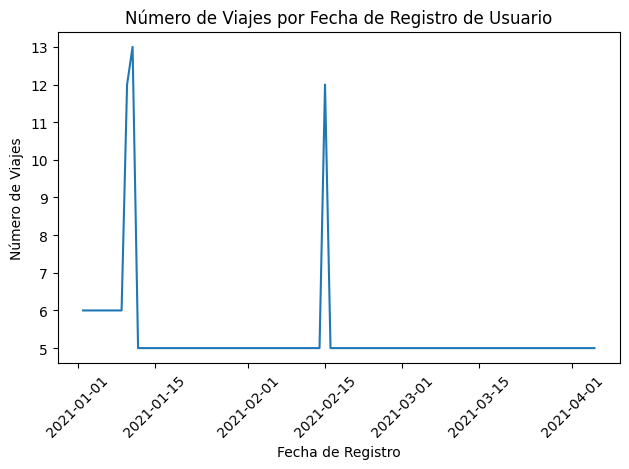

In [8]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de la conexión
server = 'OUTREACH-PC\\SQLEXPRESS'
database = 'Ubidify'
driver = 'ODBC Driver 17 for SQL Server'

try:
    # Establecer la conexión
    conexion = pyodbc.connect(f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;')

    # Consulta SQL
    query = """
    SELECT U.Fecha_Registro, COUNT(V.ID_Viaje) as Num_Viajes
    FROM Usuarios U
    JOIN Viajes V ON U.ID_Usuario = V.ID_Usuario
    GROUP BY U.Fecha_Registro
    ORDER BY U.Fecha_Registro;
    """

    # Cargar los resultados en un DataFrame
    df = pd.read_sql_query(query, conexion)

    # Cerrar conexión
    conexion.close()

    # Mostrar DataFrame
    print(df.head())
    
    # Crear gráfico
    sns.lineplot(data=df, x='Fecha_Registro', y='Num_Viajes')
    plt.title('Número de Viajes por Fecha de Registro de Usuario')
    plt.xlabel('Fecha de Registro')
    plt.ylabel('Número de Viajes')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: {e}")

In [7]:
import pandas as pd

data = [['Alex', 10], ['Bob', 12], ['Clarke', 13]]
df = pd.DataFrame(data, columns=['Name', 'Age'])

print(df)


     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


## Integración de Python en Power BI para la creación de scripts y visualizaciones

Una de las características más poderosas de Power BI es su capacidad para integrarse con diversas herramientas y fuentes de datos, Python es uno de los lenguajes de programación que pueden ser ejecutados en Power BI . Esta integración permite a los usuarios llevar sus análisis a un nuevo nivel, combinando la flexibilidad y potencia de Python con las capacidades de visualización de Power BI.

#### Uso de Pandas en Power BI

Cuando se trata de integrar Python en Power BI, Pandas entra en juego específicamente cuando se activa el soporte para scripts Python dentro de Power BI. Aquí hay varias razones y formas en que pandas es útil en este contexto:

• Transformaciones complejas

Aunque Power Query es potente, hay ciertas operaciones de limpieza de datos o transformaciones específicas que son fácilmente manejables o posibles con pandas. Por ejemplo, operaciones complejas de fecha y hora, manipulaciones de texto avanzadas, o cálculos personalizados que dependen de la lógica de programación que es más directamente expresable en Python.

• Automatización de procesos

Pandas permite automatizar ciertas tareas de manipulación de datos que pueden ser repetitivas y tediosas en Power Query, especialmente cuando se integran datos de múltiples fuentes que requieren una preparación extensiva.

#### Análisis y modelado de datos

Pandas es fundamental para el análisis de datos en Python, proporcionando estructuras de datos y operaciones de manipulación de datos que facilitan el análisis y el modelado estadístico o de machine learning dentro de Power BI usando Python.

Permite la integración de bibliotecas de Python como scikit-learn para modelos de machine learning o statsmodels para análisis estadísticos, donde los df de pandas son la estructura de datos estándar.

#### Visualización de datos avanzada

Al usar Python en Power BI para crear visualizaciones, pandas junto con bibliotecas como matplotlib, seaborn, o plotly, se pueden crear gráficos complejos y altamente personalizados que no son directamente posibles con las visualizaciones estándar de Power BI.

Antes de comenzar, asegúrate de tener configurado tu entorno de Power BI según lo aprendido en la clase anterior. A continuación, crearemos un script en nuestro entorno de desarrollo local de Python, en donde nos aseguraremos de que se ejecute correctamente.

In [9]:
import pandas as pd

data = [['Alex', 10], ['Bob', 12], ['Clarke', 13]]
df = pd.DataFrame(data, columns=['Name', 'Age'])

print(df)


     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


💻 Cargar datos mediante un script

1 En la cinta Inicio, selecciona Obtener datos > Otro. También puedes escribir "python" en el buscador.

2 Selecciona Otros > script de Python.

3 Selecciona Conectar. Tu última versión local de Python instalada se selecciona como tu motor de Python. Copia el script en el cuadro de diálogo de script de Python que aparece.

4 Selecciona Aceptar. Si el script se ejecuta correctamente, aparece el Navegador y puedes cargar los datos y utilizarlos. Para el ejemplo, selecciona df, como se muestra en la imagen y, a continuación, Cargar.

💻 Visualizaciones de python en Power BI

1 Selecciona el icono visual de Python en el panel Visualizaciones.

2 En el cuadro de diálogo Habilitar objetos visuales de script que aparece, selecciona Habilitar.

Al agregar un objeto visual de Python a un informe, Power BI Desktop realiza las siguientes acciones:

Aparece una imagen visual de Python de marcador de posición en el lienzo del informe.

El editor de scripts de Python aparece en la parte inferior del panel central.

3 A continuación, arrastraremos los campos Edad, Niños, Fname, Género, Mascotas, Estado y Peso a la sección Valores donde dice Agregar campos de datos aquí.

El script de Python solo puede usar campos agregados a la sección Valores. Podemos agregar o quitar campos de la sección Valores mientras trabajamos en el script. Power BI Desktop detecta automáticamente los cambios de campo.

4 Ahora podemos usar los datos para crear un objeto visual.

A medida que seleccionamos o eliminamos campos, el código de soporte en el editor de scripts de Python se genera o elimina automáticamente.

Se puede acceder a las columnas del conjunto de datos utilizando sus respectivos nombres. Por ejemplo, codificar en el script de Python para acceder al campo de edad.dataset["Age"].

5 Con el marco de datos generado automáticamente por los campos, se puede escribir un script de Python que resulte en el trazado predeterminado de Python. Cuando se complete el script, seleccionamos Ejecutar desde la barra de título del editor de scripts de Python.

💻 Gráfico de dispersión

import matplotlib.pyplot as plt

dataset.plot(kind='scatter', x='Age', y='Weight', color='red')


plt.show()

💻 Gráfico de líneas

import matplotlib.pyplot as plt 


ax = plt.gca() 

dataset.plot(kind='line',x='Fname',y='Children',ax=ax) 

dataset.plot(kind='line',x='Fname',y='Pets', color='red', ax=ax) 


plt.show()


💻 Gráfico de barras

import matplotlib.pyplot as plt 


dataset.plot(kind='bar',x='Fname',y='Age')

 

plt.show()

Los objetos visuales de Python en Power BI Desktop tienen algunas limitaciones:

Tamaño de datos: si el conjunto de datos de entrada de un objeto visual de Python tiene una columna que contiene un valor de cadena superior a 32766 caracteres, ese valor se trunca.

Resolución: todas las imágenes de Python se muestran a 72 DPI (72 pixeles por pulgada).

Limitación de tiempo de cálculo: si un cálculo visual de Python supera los cinco minutos, se agota el tiempo de espera de ejecución, lo que resulta en un error.

Relaciones: al igual que con otros objetos visuales de Power BI Desktop, si se seleccionan campos de datos de diferentes tablas sin una relación definida entre ellos, se produce un error.

Interactividad: los objetos visuales de Python se actualizan tras las actualizaciones de datos, el filtrado y el resaltado. Sin embargo, la imagen en sí no es interactiva y no puede ser la fuente de filtrado cruzado.

Filtrado interactivo: los elementos visuales de Python responden a resaltar otros elementos visuales, pero no puede hacer clic en elementos en el objeto visual de Python para filtrar otros elementos.

Dispositivo de visualización: solo los gráficos que se trazan en el dispositivo de visualización predeterminado de Python se muestran correctamente en el lienzo. Evite usar explícitamente un dispositivo de visualización Python diferente.

Nombres de columnas: los objetos visuales de Python no admiten el cambio de nombre de las columnas de entrada. Las columnas se denominan por su nombre original durante la ejecución del script.

## Limitaciones y buenas prácticas

El análisis de datos ha transformado la manera en que las organizaciones toman decisiones.

Las herramientas que hemos aprendido, como bases de datos SQL, Power BI, Google Sheets y Python son fundamentales en este proceso, pero cada una tiene sus propias limitaciones y existen buenas prácticas que pueden ayudar a maximizar su eficacia. 

A continuación, explicaremos estas herramientas bajo tres aspectos críticos: rendimiento, seguridad y mantenibilidad.

Google Sheets

Rendimiento

No está diseñado para manejar grandes volúmenes de datos o análisis muy complejos.  Limitar el uso de Google Sheets a análisis de menor escala y datos que no requieran cálculos intensivos

Seguridad

Al ser un servicio basado en la nube, depende de la seguridad de la cuenta de Google y es susceptible a riesgos de compartición inadecuada de información.  Utilizar la autenticación de dos factores para las cuentas de Google y ser cauteloso al compartir hojas y carpetas.

Mantenibilidad

Organizar las hojas claramente y mantener la documentación dentro de las propias hojas para explicar fórmulas y datos.

Si bien en organizaciones tanto Excel como Google Sheets son muy utilizadas para reportes, a medida que el volumen y la necesidad de actualización crece, es importante considerar migrar los reportes a herramientas como Power BI, Tableau o Looker. Esto permite automatizar la actualización y generar una escala en el volumen de datos a procesar.

Power BI

Rendimiento

Power BI puede volverse lento con datasets muy grandes o con muchas visualizaciones complejas en un solo reporte. Aprender a utilizar el Servicio de Power BI en la nube, puede mejorar la capacidad para segmentar los datos y reducir la carga. También es recomendable profundizar en técnicas de modelado de datos eficientes como modelos estrellas o copo de nieve.

Seguridad

Controlar el acceso a los datos y reportes puede ser un desafío, especialmente en organizaciones grandes. Si bien existen estrategias para poder administrar gran cantidad de usuarios sin aumentar los costos de licenciamiento mediante reportes embebidos, esto puede generar ciertos riesgos de seguridad.

Mantenibilidad

Crear dashboards y reportes con una estructura clara y documentar los procesos y fuentes de datos utilizados. Desarrollar reportes en Power BI requiere de iteraciones periódicas y refactoring tanto del modelo como del storytelling que poseen los dashboards. Recuerda que al entregar una primera versión de cualquier desarrollo, implica inevitablemente mejoras que deben ser abordadas en el futuro.

Bases de Datos y SQL

Rendimiento

Las bases de datos pueden experimentar lentitud con grandes volúmenes de datos o consultas complejas sin una adecuada optimización de índices y consultas. Utilizar índices, optimizar las consultas SQL y regularmente monitorear y ajustar el rendimiento de la base de datos, es fundamental para una utilización óptima. Si bien existe la posibilidad de conectar herramientas de visualización a entornos productivos, esto no es recomendable bajo ningún aspecto, debido a que puede afectar el funcionamiento de la BD transaccional que fue ideada para operar con alguna aplicación. En estos casos se recomienda pensar en réplicas, datalakes, etc.

Seguridad

La exposición a inyecciones SQL y accesos no autorizados son riesgos significativos si no se gestionan correctamente los permisos y las entradas de datos.

Mantenibilidad

Se debe mantener un esquema de consulta de base de datos bien documentado, esto permite realizar refactoring o seguimiento de los scripts de SQL que se desarrollan para la elaboración de datasets.

Python

Rendimiento

El rendimiento puede ser un problema con el procesamiento de grandes volúmenes de datos debido a que Python es un lenguaje interpretado. Pueden existir problemas relacionados a la capacidad de memoria RAM, bucles infinitos u otro tipo de errores que afecten el rendimiento.

Seguridad

Scripts mal escritos que se conectan a bases de datos productivas, pueden ser vulnerables a inyecciones de código y ataques de datos. Se deben validar y sanear todas las entradas de datos cuando se ejecuten scripts que interactúan con fuentes externas. Utilizar entornos virtuales para aislar y gestionar dependencias.

Mantenibilidad

Es importante escribir código limpio y bien documentado, y utilizar control de versiones para gestionar los cambios en el código.